## TRAIN with Kaerebrum on AUGMENTED MNIST DATASET

In [1]:
import matplotlib.pyplot as plt
import pandas
import tensorflow as tf 


# append path as needed for your own machine
import sys
sys.path.append(r'C:\Users\User\jupyter\KaelanML')
sys.path.append(r'C:\Users\User\jupyter\KaelanML\mlcode')

import numpy as np
np.set_printoptions(suppress = True)
np.printoptions(threshold=sys.maxsize)
import gzip
# test set  
with open(r'C:\Users\User\jupyter\KaelanML\testcode\b0cdab8e37ae7c1c5560ee858afaac1d', "rb") as f: 
    datatest = f.read()

with open(r'C:\Users\User\jupyter\KaelanML\testcode\d4fdde61aca9f72d5fe2315410bb46a5', "rb") as f:
    datatest2 = f.read()
    
# train set
with open(r'C:\Users\User\jupyter\KaelanML\testcode\23278f029ff68f1e993776e500ce06b9', "rb") as f:
    datatrain = f.read()

with open(r'C:\Users\User\jupyter\KaelanML\testcode\d8b415e67abd11881e156b8f111d3300', "rb") as f:
    datatrain2 = f.read()

X_train = np.frombuffer(gzip.decompress(datatrain), dtype=np.uint8)[0x10:].reshape(-1, 28,28)
y_train = np.frombuffer(gzip.decompress(datatrain2), dtype=np.uint8)[8:]
X_valid = np.frombuffer(gzip.decompress(datatest), dtype=np.uint8)[0x10:].reshape(-1, 28,28)
y_valid = np.frombuffer(gzip.decompress(datatest2), dtype=np.uint8)[8:]

In [7]:
#with np.printoptions(threshold=sys.maxsize):
    #print(X_train[3])
    
#%reset out # to clear variables from memory

## Create Augmented Data

Base 60k images from Mnist dataset.

Augment:
1. Rotate image 40 degree 1)left, 2)right    
60k * 2 + 60k base imagees
2. Move image 3)left  4)right  5)up  6)down  
180k * 4 + 180k rotated images 

Total 900,000 image


## Test out effects

In [2]:
# not converting image to BW as image is already in BW (black and white)
from PIL import Image
bw_array = X_train[120]
bw_image = Image.fromarray(bw_array) # convert into image
bw_image.mode # default in black and white

'L'

In [3]:
bw_image

### Rotate

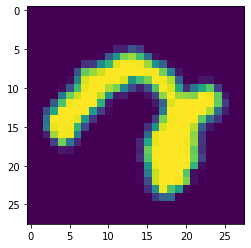

In [7]:
# image rotated to left
rotated = bw_image.rotate(40, Image.BILINEAR, expand = False) 
plt.imshow(rotated)

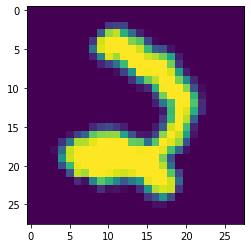

In [12]:
# image rotated to right
rotated = bw_image.rotate(-40, Image.BILINEAR, expand = False) 
plt.imshow(rotated)

## Zoom

In [10]:
from scipy.ndimage import zoom

In [21]:
zoomed = zoom(rotated, 0.6)

In [22]:
zoomed.shape

(17, 17)

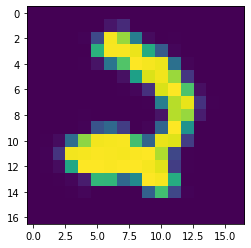

In [23]:
plt.imshow(zoomed)

## SHIFT IMAGE

In [28]:
# can directly implement in image mode 
from scipy.ndimage import shift  

In [29]:
bw_image  # image

In [30]:
bw_array = np.asarray(bw_image)  # in array mode

In [31]:
#directly apply shift in image mode, will convert image to array
shifted_image = shift(bw_image,[-4,0],cval=0, mode='constant') 

In [32]:
shifted_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   9,   7,  13, 117, 191,
         76,   7,   6,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2,  83, 100, 145, 223, 167, 173, 253, 253,
        253, 203, 133, 145,  65,   7,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 106, 253, 253, 253, 253, 253, 253, 253, 253,
        253, 254, 253, 253, 253, 184,  38,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 254, 253, 253, 253, 253, 253, 253, 253, 253,
        253, 254, 253, 253, 253, 253, 140,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 254, 253, 253, 253, 253, 253, 253, 253, 198,
        193, 254, 253, 253, 253, 253, 180,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [74]:
shifted_image = Image.fromarray(shifted_image) 
shifted_image.mode

'L'

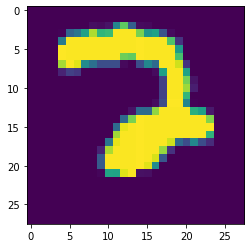

In [34]:
plt.imshow(shifted_image) 

In [33]:
shifted_image = shift(bw_array,[-3,0],cval=0, mode='constant')

## BUILD IMAGE AUGMENTATION PIPELINE

### Create Training data

In [35]:
from PIL import Image
X_train_augmented =  [x for x in X_train]
y_train_augmented = [label for label in y_train]
len(X_train_augmented)

60000

In [6]:
# Create Rotated training data
import random

for degree in (1, -1):
    for array, label in zip(X_train, y_train):        
        slant_list = (20,30)
        slant = random.choice(slant_list) * degree
        image = Image.fromarray(array)
        image = image.rotate(slant, Image.BILINEAR, expand = False)
        image = np.asarray(image)
        X_train_augmented.append(image)
        y_train_augmented.append(label)

len(X_train_augmented)       

180000

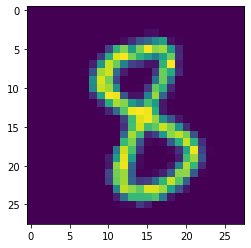

In [7]:
plt.imshow(X_train_augmented[90019])

In [8]:
y_train_augmented[160012]

8

In [9]:
# X_aug = X_train_augmented is bad !!!! Try create a copy else the loop will cause issue as X_aug and X_train might refer to same variable array

X_aug = [x for x in X_train_augmented]
y_aug = [label for label in y_train_augmented]
len(X_aug)

180000

In [21]:
# d = 3
# dist_list = ((d,0),(-d,0),(0,d),(0,-d))
# for dx, dy in dist_list:
#     for image, label in zip(X_train_augmented[:10], y_train_augmented[:10]):
#         X_aug.append(shift(image,[dx, dy], cval=0,mode='constant'))
#         y_aug.append(label)

# for image, label in zip(X_train_augmented[], y_train_augmented):
#     d_choice = (1,2,3)
#     d = random.choice(d_choice)
#     dist_list = ((d,0),(-d,0),(0,d),(0,-d))
#     for dx, dy in dist_list:
#         X_aug.append(shift(image,[dx, dy], cval=0,mode='constant'))
#         y_aug.append(label)

# # Create Shifted training data
from scipy.ndimage import shift 
dist_list = ((1,0),(-1,0),(0,1),(0,-1))

i = 1
for image, label in zip(X_train_augmented, y_train_augmented):
    for dx, dy in dist_list:
        if not i%10000 :
            print(i)
        d_choice = (1,2,3)
        d = random.choice(d_choice)
        dx, dy = dx * d, dy *d
        X_aug.append(shift(image,[dx, dy], cval=0,mode='constant'))
        y_aug.append(label)
        i += 1


10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000


In [24]:
len(X_aug)

900000

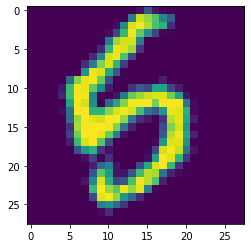

In [25]:
plt.imshow(X_aug[800000])

In [26]:
y_aug[800000]

5

In [28]:
# Convert list of array back to array and shuffle them 
shuffle = np.random.permutation(len(X_aug))
X_aug = np.asarray(X_aug)[shuffle]
y_aug = np.asarray(y_aug)[shuffle]

### Create Validation data

In [77]:
X_valid_augmented =  [x for x in X_valid]
y_valid_augmented = [label for label in y_valid]
len(X_valid_augmented)

10000

In [78]:
# Create Rotated training data
import random

for degree in (1, -1):
    for array, label in zip(X_valid, y_valid):        
        slant_list = (20,30)
        slant = random.choice(slant_list) * degree
        image = Image.fromarray(array)
        image = image.rotate(slant, Image.BILINEAR, expand = False)
        image = np.asarray(image)
        X_valid_augmented.append(image)
        y_valid_augmented.append(label)

len(X_valid_augmented) 

30000

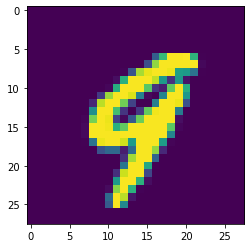

In [81]:
plt.imshow(X_valid_augmented[5100])

In [82]:
y_valid[5100]

9

In [83]:
X_valid_aug = [x for x in X_valid_augmented]
y_valid_aug = [label for label in y_valid_augmented]
len(X_valid_aug)

30000

In [84]:
from scipy.ndimage import shift 
dist_list = ((1,0),(-1,0),(0,1),(0,-1))

i = 1
for image, label in zip(X_valid_augmented, y_valid_augmented):
    for dx, dy in dist_list:
        if not i%10000 :
            print(i)
        d_choice = (1,2,3)
        d = random.choice(d_choice)
        dx, dy = dx * d, dy *d
        X_valid_aug.append(shift(image,[dx, dy], cval=0,mode='constant'))
        y_valid_aug.append(label)
        i += 1

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000


In [85]:
len(X_valid_aug)

150000

In [86]:
# Convert list of array back to array and shuffle them 
shuffle = np.random.permutation(len(X_valid_aug))
X_valid_aug = np.asarray(X_valid_aug)[shuffle]
y_valid_aug = np.asarray(y_valid_aug)[shuffle]

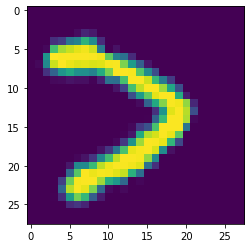

In [90]:
plt.imshow(X_valid_aug[101101])

In [89]:
y_valid_aug[101101]

7

##  Convert Array into compressed file 

In [30]:
from numpy import savez_compressed
savez_compressed('Mnist_augmentedX.npz', X_aug)
savez_compressed('Mnist_augmentedY.npz', y_aug)

In [60]:
y_data = np.load('Mnist_augmentedY.npz')

In [61]:
y_data['arr_0'].shape

(900000,)

In [62]:
X_data = np.load('Mnist_augmentedX.npz')

In [63]:
X_data['arr_0'].shape

(900000, 28, 28)

In [59]:
from numpy import savez_compressed
savez_compressed('Mnist_augmentedX_valid.npz', X_valid_aug)
savez_compressed('Mnist_augmentedY_valid.npz', y_valid_aug)

## Process data for training

In [47]:
X_aug = X_aug.reshape(-1,28*28)

In [49]:
X_aug = X_aug/255  # normalize data 

## Start train new model

In [4]:
from Kaerebrum.utils import *
from Kaerebrum import Axon

In [73]:
model = Axon([400, 49], 10, 'N', 'He')
model.build([sigmoid,sigmoid,sigmoid,sigmoid], optimizer = adam)
%time pred = model.train(X_aug, y_aug, epoch = 10, alpha=0.001, batch=512) 

[<function sigmoid at 0x0000023256071E50>, <function sigmoid at 0x0000023256071E50>, <function sigmoid at 0x0000023256071E50>, <function sigmoid at 0x0000023256071E50>]
[784, 400, 49, 10]
No of iterations/ n_iters: 10
Learning rate/ alpha: 0.001
Optimizer <function adam at 0x0000023256073430>
Loss Function: <function logloss at 0x0000023256073160>
Regularization: None
Shuffle data on each iteration: False
Current accuracy: 0.8604122222222222 for epoch 0:
Cost: 0.4585177209116519
Current accuracy: 0.9423677777777778 for epoch 1:
Cost: 0.18745937226125592
Current accuracy: 0.9604433333333333 for epoch 2:
Cost: 0.13275804967606464
Current accuracy: 0.9689366666666667 for epoch 3:
Cost: 0.1062940763603128
Current accuracy: 0.9737911111111112 for epoch 4:
Cost: 0.08731915299460072
Current accuracy: 0.97693 for epoch 5:
Cost: 0.07251480603685707
Current accuracy: 0.9792811111111112 for epoch 6:
Cost: 0.06159639383598653
Current accuracy: 0.9812366666666666 for epoch 7:
Cost: 0.05420385876144

In [ ]:
test.accuracy(result[0],y_train)

In [89]:
model.save(model,'aug_model')

## Check on validation data

In [91]:
# process validation data
X_valid_aug = X_valid_aug.reshape(-1,28*28)
X_valid_aug = X_valid_aug/255

In [65]:
import joblib
model = joblib.load('aug_model')

In [97]:
pred = model.predict(X_valid.reshape(-1,28*28)/255)

In [98]:
model.accuracy(pred[0], y_valid)

0.9845